In [1]:
# InstructPix2Pix_BatchImageEditor.ipynb

## Step 1: Install dependencies
!pip install diffusers transformers accelerate --quiet
!pip install torch torchvision --quiet
!pip install matplotlib pillow --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.1 MB/s eta 0:00:00


In [2]:
## Step 2: Import Libraries
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline
from PIL import Image
import os
from torchvision import transforms
import matplotlib.pyplot as plt

# For progress bar
from tqdm import tqdm


In [3]:
## Step 3: Load the InstructPix2Pix Model
device = "cuda" if torch.cuda.is_available() else "cpu"

pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(
    "timbrooks/instruct-pix2pix",
    torch_dtype=torch.float16 if device == "cuda" else torch.float32,
    safety_checker=None  # Optional: disable safety checker
).to(device)

pipe.enable_attention_slicing()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/569 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [4]:
## Step 4: Define Image Processing Function
def edit_image(image_path, prompt, output_path, num_inference_steps=50, guidance_scale=7.5, image_guidance_scale=1.5):
    image = Image.open(image_path).convert("RGB")

    edited_image = pipe(
        prompt=prompt,
        image=image,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        image_guidance_scale=image_guidance_scale
    ).images[0]

    edited_image.save(output_path)
    return edited_image


In [6]:
!unzip /content/images_2.zip

Archive:  /content/images_2.zip
   creating: images_2/
  inflating: images_2/frame_00001.jpg  
  inflating: images_2/frame_00002.jpg  
  inflating: images_2/frame_00003.jpg  
  inflating: images_2/frame_00004.jpg  
  inflating: images_2/frame_00005.jpg  
  inflating: images_2/frame_00006.jpg  
  inflating: images_2/frame_00007.jpg  
  inflating: images_2/frame_00008.jpg  
  inflating: images_2/frame_00009.jpg  
  inflating: images_2/frame_00010.jpg  
  inflating: images_2/frame_00011.jpg  
  inflating: images_2/frame_00012.jpg  
  inflating: images_2/frame_00013.jpg  
  inflating: images_2/frame_00014.jpg  
  inflating: images_2/frame_00015.jpg  
  inflating: images_2/frame_00016.jpg  
  inflating: images_2/frame_00017.jpg  
  inflating: images_2/frame_00018.jpg  
  inflating: images_2/frame_00019.jpg  
  inflating: images_2/frame_00020.jpg  
  inflating: images_2/frame_00021.jpg  
  inflating: images_2/frame_00022.jpg  
  inflating: images_2/frame_00023.jpg  
  inflating: images_2/fra

In [7]:
## Step 5: Batch Process a Folder of Images

# Set these paths
input_folder = "/content/images_2"
output_folder = "edited_images"
prompt = "make it look like a watercolor painting"  # <-- Change this prompt

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Loop through all images
for filename in tqdm(os.listdir(input_folder)):
    if filename.lower().endswith((".png", ".jpg", ".jpeg")):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)
        try:
            edit_image(input_path, prompt, output_path)
        except Exception as e:
            print(f"Error processing {filename}: {e}")


  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  1%|          | 1/96 [00:13<21:46, 13.75s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

  2%|▏         | 2/96 [00:26<20:23, 13.02s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

  3%|▎         | 3/96 [00:39<20:07, 12.98s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

  4%|▍         | 4/96 [00:52<20:11, 13.17s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

  5%|▌         | 5/96 [01:05<20:02, 13.22s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

  6%|▋         | 6/96 [01:18<19:39, 13.11s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

  7%|▋         | 7/96 [01:31<19:25, 13.09s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

  8%|▊         | 8/96 [01:44<19:07, 13.04s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

  9%|▉         | 9/96 [01:57<18:50, 13.00s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 10%|█         | 10/96 [02:10<18:38, 13.01s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 11%|█▏        | 11/96 [02:23<18:27, 13.03s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 12%|█▎        | 12/96 [02:36<18:13, 13.02s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 14%|█▎        | 13/96 [02:49<17:59, 13.01s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 15%|█▍        | 14/96 [03:02<17:43, 12.97s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 16%|█▌        | 15/96 [03:15<17:28, 12.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 17%|█▋        | 16/96 [03:28<17:15, 12.95s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 18%|█▊        | 17/96 [03:41<17:03, 12.95s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 19%|█▉        | 18/96 [03:54<16:50, 12.96s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 20%|█▉        | 19/96 [04:07<16:37, 12.96s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 21%|██        | 20/96 [04:20<16:24, 12.95s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 22%|██▏       | 21/96 [04:33<16:10, 12.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 23%|██▎       | 22/96 [04:46<15:57, 12.93s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 24%|██▍       | 23/96 [04:59<15:44, 12.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 25%|██▌       | 24/96 [05:12<15:31, 12.93s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 26%|██▌       | 25/96 [05:24<15:17, 12.92s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 27%|██▋       | 26/96 [05:37<15:04, 12.92s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 28%|██▊       | 27/96 [05:50<14:51, 12.91s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 29%|██▉       | 28/96 [06:03<14:37, 12.90s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 30%|███       | 29/96 [06:16<14:24, 12.90s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 31%|███▏      | 30/96 [06:29<14:11, 12.90s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 32%|███▏      | 31/96 [06:42<13:58, 12.91s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 33%|███▎      | 32/96 [06:55<13:46, 12.91s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 34%|███▍      | 33/96 [07:08<13:33, 12.91s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 35%|███▌      | 34/96 [07:21<13:20, 12.92s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 36%|███▋      | 35/96 [07:34<13:09, 12.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 38%|███▊      | 36/96 [07:47<12:56, 12.93s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 39%|███▊      | 37/96 [07:59<12:42, 12.93s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 40%|███▉      | 38/96 [08:12<12:29, 12.93s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 41%|████      | 39/96 [08:25<12:16, 12.93s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 42%|████▏     | 40/96 [08:38<12:04, 12.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 43%|████▎     | 41/96 [08:51<11:51, 12.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 44%|████▍     | 42/96 [09:04<11:39, 12.95s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 45%|████▍     | 43/96 [09:17<11:26, 12.96s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 46%|████▌     | 44/96 [09:30<11:14, 12.96s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 47%|████▋     | 45/96 [09:43<11:00, 12.96s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 48%|████▊     | 46/96 [09:56<10:47, 12.95s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 49%|████▉     | 47/96 [10:09<10:34, 12.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 50%|█████     | 48/96 [10:22<10:21, 12.95s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 51%|█████     | 49/96 [10:35<10:08, 12.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 52%|█████▏    | 50/96 [10:48<09:55, 12.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 53%|█████▎    | 51/96 [11:01<09:42, 12.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 54%|█████▍    | 52/96 [11:14<09:29, 12.93s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 55%|█████▌    | 53/96 [11:27<09:16, 12.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 56%|█████▋    | 54/96 [11:40<09:03, 12.93s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 57%|█████▋    | 55/96 [11:52<08:50, 12.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 58%|█████▊    | 56/96 [12:05<08:37, 12.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 59%|█████▉    | 57/96 [12:18<08:24, 12.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 60%|██████    | 58/96 [12:31<08:11, 12.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 61%|██████▏   | 59/96 [12:44<07:58, 12.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 62%|██████▎   | 60/96 [12:57<07:45, 12.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 64%|██████▎   | 61/96 [13:10<07:32, 12.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 65%|██████▍   | 62/96 [13:23<07:19, 12.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 66%|██████▌   | 63/96 [13:36<07:06, 12.93s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 67%|██████▋   | 64/96 [13:49<06:53, 12.93s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 68%|██████▊   | 65/96 [14:02<06:40, 12.92s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 69%|██████▉   | 66/96 [14:15<06:27, 12.92s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 70%|██████▉   | 67/96 [14:28<06:14, 12.93s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 71%|███████   | 68/96 [14:41<06:01, 12.92s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 72%|███████▏  | 69/96 [14:54<05:48, 12.93s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 73%|███████▎  | 70/96 [15:06<05:36, 12.93s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 74%|███████▍  | 71/96 [15:19<05:23, 12.93s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 75%|███████▌  | 72/96 [15:32<05:10, 12.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 76%|███████▌  | 73/96 [15:45<04:57, 12.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 77%|███████▋  | 74/96 [15:58<04:44, 12.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 78%|███████▊  | 75/96 [16:11<04:31, 12.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 79%|███████▉  | 76/96 [16:24<04:18, 12.94s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 80%|████████  | 77/96 [16:37<04:05, 12.93s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 81%|████████▏ | 78/96 [16:50<03:52, 12.92s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 82%|████████▏ | 79/96 [17:03<03:39, 12.92s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 83%|████████▎ | 80/96 [17:16<03:26, 12.92s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 84%|████████▍ | 81/96 [17:29<03:13, 12.92s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 85%|████████▌ | 82/96 [17:42<03:00, 12.92s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 86%|████████▋ | 83/96 [17:55<02:48, 12.92s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 88%|████████▊ | 84/96 [18:07<02:35, 12.93s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 89%|████████▊ | 85/96 [18:20<02:22, 12.92s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 90%|████████▉ | 86/96 [18:33<02:09, 12.92s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 91%|█████████ | 87/96 [18:46<01:56, 12.92s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 92%|█████████▏| 88/96 [18:59<01:43, 12.93s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 93%|█████████▎| 89/96 [19:12<01:30, 12.92s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 94%|█████████▍| 90/96 [19:25<01:17, 12.93s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 95%|█████████▍| 91/96 [19:38<01:04, 12.92s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 96%|█████████▌| 92/96 [19:51<00:51, 12.92s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 97%|█████████▋| 93/96 [20:04<00:38, 12.92s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 98%|█████████▊| 94/96 [20:17<00:25, 12.92s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

 99%|█████████▉| 95/96 [20:30<00:12, 12.93s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 96/96 [20:43<00:00, 12.95s/it]


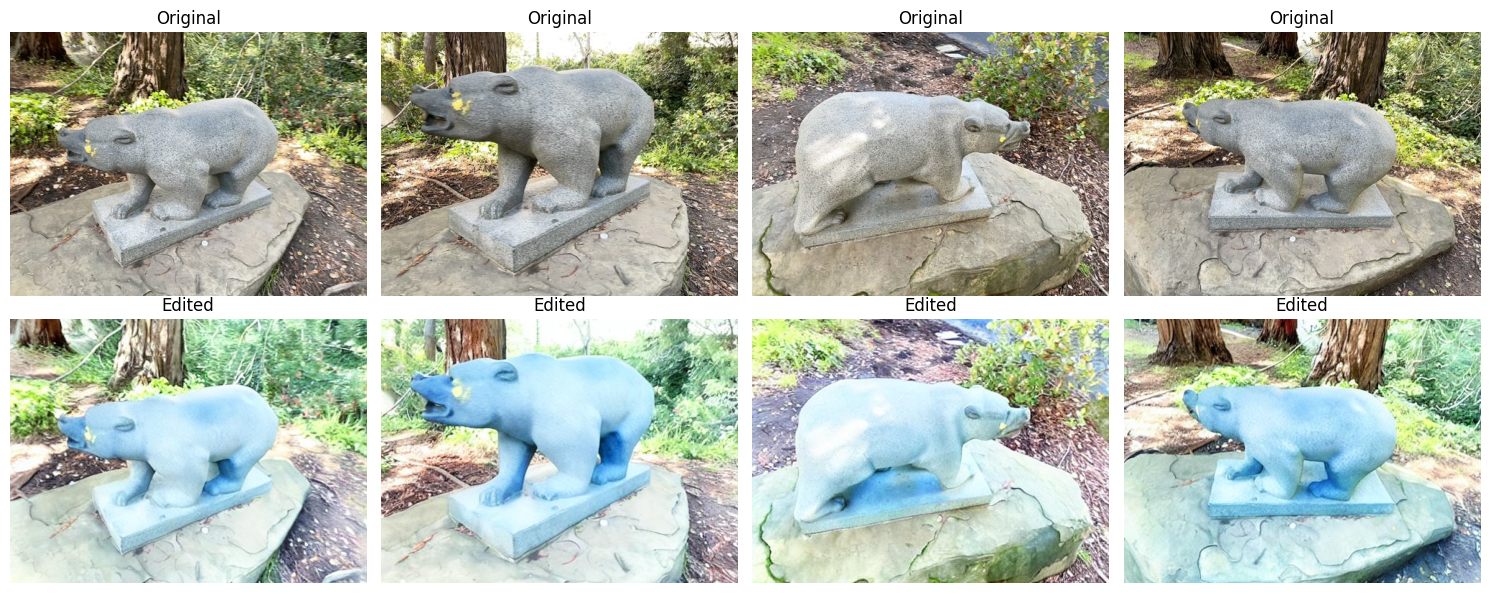

In [8]:
## Step 6: Visualize Some Results
import random

# List edited images
edited_files = [f for f in os.listdir(output_folder) if f.lower().endswith(('jpg', 'jpeg', 'png'))]
sampled = random.sample(edited_files, min(4, len(edited_files)))

fig, axes = plt.subplots(2, len(sampled), figsize=(15, 6))

for i, file in enumerate(sampled):
    original = Image.open(os.path.join(input_folder, file))
    edited = Image.open(os.path.join(output_folder, file))
    axes[0, i].imshow(original)
    axes[0, i].set_title("Original")
    axes[0, i].axis('off')

    axes[1, i].imshow(edited)
    axes[1, i].set_title("Edited")
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()
